# Tobacco Use Trends from 1994 to 2010

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

**Exploring our data**

In [2]:
tb = pd.read_csv('tobacco.csv')
print(tb.head())


   Year        State Smoke everyday Smoke some days Former smoker  \
0  1996  Puerto Rico          9.40%           5.10%           16%   
1  1997  Puerto Rico          9.40%              5%        15.70%   
2  1998  Puerto Rico         10.10%           5.20%        16.80%   
3  1999  Puerto Rico          9.70%              4%        15.30%   
4  2000  Puerto Rico          9.20%           3.90%        15.20%   

  Never smoked     Location 1  
0       69.50%  Puerto Rico\n  
1       69.90%  Puerto Rico\n  
2       67.90%  Puerto Rico\n  
3          71%  Puerto Rico\n  
4       71.60%  Puerto Rico\n  


In [3]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 7 columns):
Year               876 non-null int64
State              876 non-null object
Smoke everyday     876 non-null object
Smoke some days    876 non-null object
Former smoker      876 non-null object
Never smoked       876 non-null object
Location 1         839 non-null object
dtypes: int64(1), object(6)
memory usage: 48.0+ KB


**For ease of analysis, let us first remove % signs from our data. This is a fairly straight forward dataset, so I think that is all the data cleaning we'll need to do.**

In [4]:
columns = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']

for x in columns:
    tb[x] = tb[x].str.strip('%').astype('float')
    

In [5]:
tb.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,1996,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico\n
1,1997,Puerto Rico,9.4,5.0,15.7,69.9,Puerto Rico\n
2,1998,Puerto Rico,10.1,5.2,16.8,67.9,Puerto Rico\n
3,1999,Puerto Rico,9.7,4.0,15.3,71.0,Puerto Rico\n
4,2000,Puerto Rico,9.2,3.9,15.2,71.6,Puerto Rico\n


# Analysis

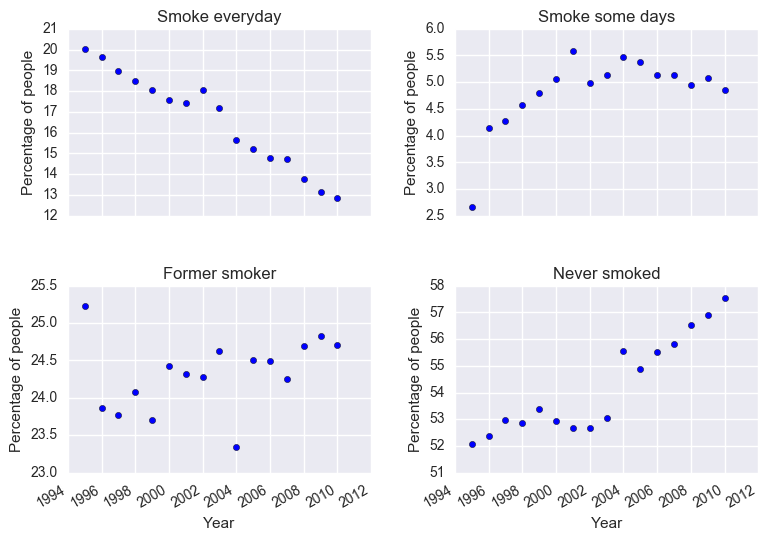

In [6]:
tb_group = tb.groupby(['Year'], as_index = False).mean()

fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

tb_group.head()

y = 'Percentage of people'
x = 'Year'

ax1.set(title = 'Smoke everyday', ylabel = y, xlabel = x)
ax2.set(title = 'Smoke some days', ylabel = y, xlabel = x)
ax3.set(title = 'Former smoker', ylabel = y, xlabel = x)
ax4.set(title = 'Never smoked', ylabel = y, xlabel = x)
ax1.scatter(tb_group.Year, tb_group['Smoke everyday'], )
ax2.scatter(tb_group.Year, tb_group['Smoke some days'])
ax3.scatter(tb_group.Year, tb_group['Former smoker'])
ax4.scatter(tb_group.Year, tb_group['Never smoked'])

fig.tight_layout()
fig.autofmt_xdate()
plt.show()

**As we can see above, the percentage of people who smoke everyday has gone down, overall. There are more people in 2010, who claim to never have smoked; up quite significantly since 1994.**

In [7]:
from scipy import stats

states = set(tb.State)

slope_dict = {}

for state in states:
    slope, intercept, r_value, p_value, std_err = stats.linregress(tb.Year[tb.State == state], tb['Never smoked'][tb.State == state])
    slope_dict[state] = slope
    
slope_df = pd.DataFrame([slope_dict]).transpose()
slope_df.columns = ['slope']
slope_df.sort(columns = 'slope', ascending = True, inplace = True)

In [8]:
slope_dict1 = {}

for state in states:
    slope, intercept, r_value, p_value, std_err = stats.linregress(tb.Year[tb.State == state], tb['Smoke everyday'][tb.State == state])
    slope_dict1[state] = slope
    
slope_df1 = pd.DataFrame([slope_dict1]).transpose()
slope_df1.columns = ['slope']
slope_df1.sort(columns = 'slope',ascending = False, inplace = True)

**Below I have made bar graphs with the percentage changes from 1994 to 2010 by state for 'Never Smoked', and 'Smoke everyday'.**

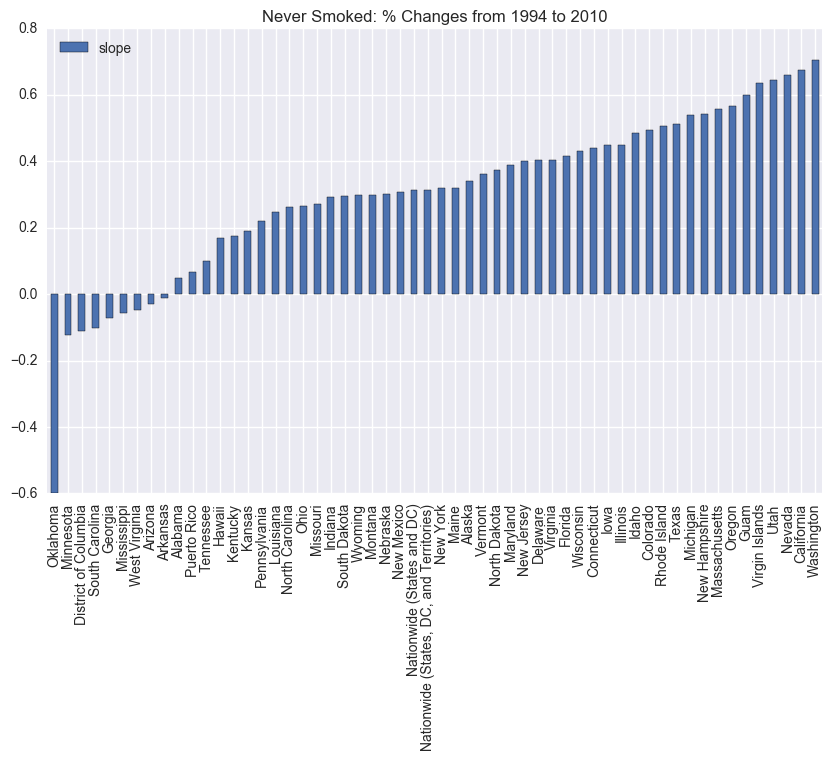

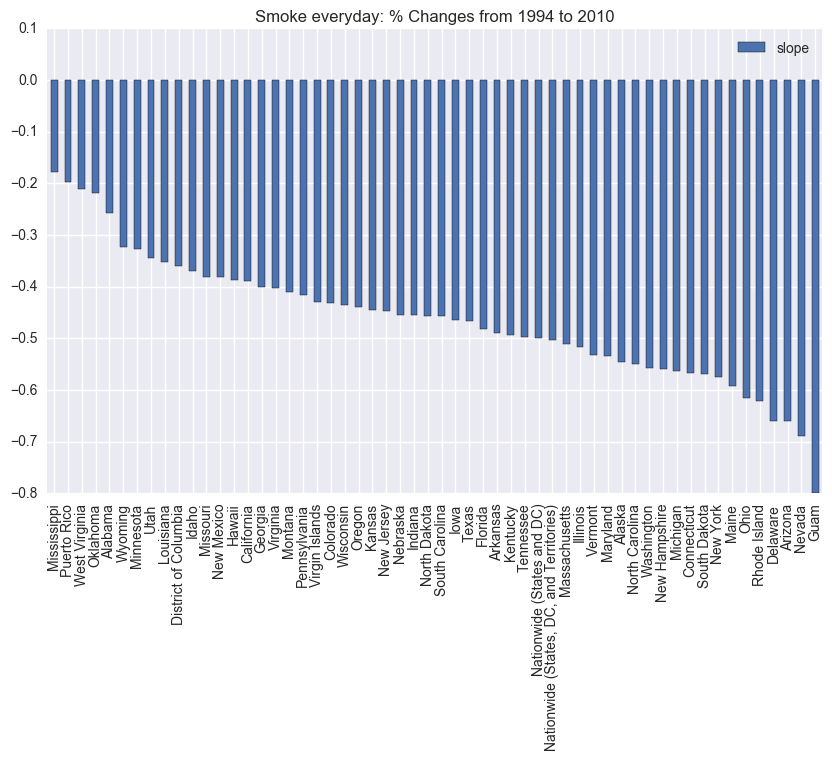

In [9]:
slope_df.plot(kind = 'bar', figsize = (10,6), title = 'Never Smoked: % Changes from 1994 to 2010')
slope_df1.plot(kind = 'bar', figsize = (10,6), title = 'Smoke everyday: % Changes from 1994 to 2010')
plt.show()

Top 10 increases in ppl who Never Smoked|Top 10 decreases in everyday smokers
----------------------------------------|------------------------------------
Washington|**Guam**
California|**Nevada**
**Nevada**|Arizona
Utah|Delaware
Virgin Islands|Rhode Island
**Guam**|Ohio
Oregon|Maine
Massechussets|New York
New Hampshire|South Dakota
Michigan|Connecticut

Bottom 10 increases in ppl who Never Smoked|Bottom 10 decreases in everyday smokers
----------------------------------------|------------------------------------
**Oklahoma**|**Mississippi**
**Minnesota**|Puerto Rico
**Washington DC**|**West Virgina**
South Carolina|**Oklahoma**
Georgia|Alabama
**Mississippi**|Wyoming
**West Virginia**|**Minnesota**
Arizona|Utah
Arkansas|Louisiana
**Alabama**|**Washington DC**

## Final Thoughts

**From the above graphs and charts, we can see that although, overall, people seemed less likely to smoke, some states, were more likely to smoke, or did not change much since 1994.**

**For example, in Washington state, California, and Nevada, people were alot more likely to have never smoked in 2010, than they were in 1994, while in Washington DC, Minnesota, and especially Oklahoma, people were alote more likely to have smoked in 2010, than in 1994.**